In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [8]:
# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisation des données (les pixels doivent être entre 0 et 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape des données pour que chaque image soit un vecteur compatible avec un MLP
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))


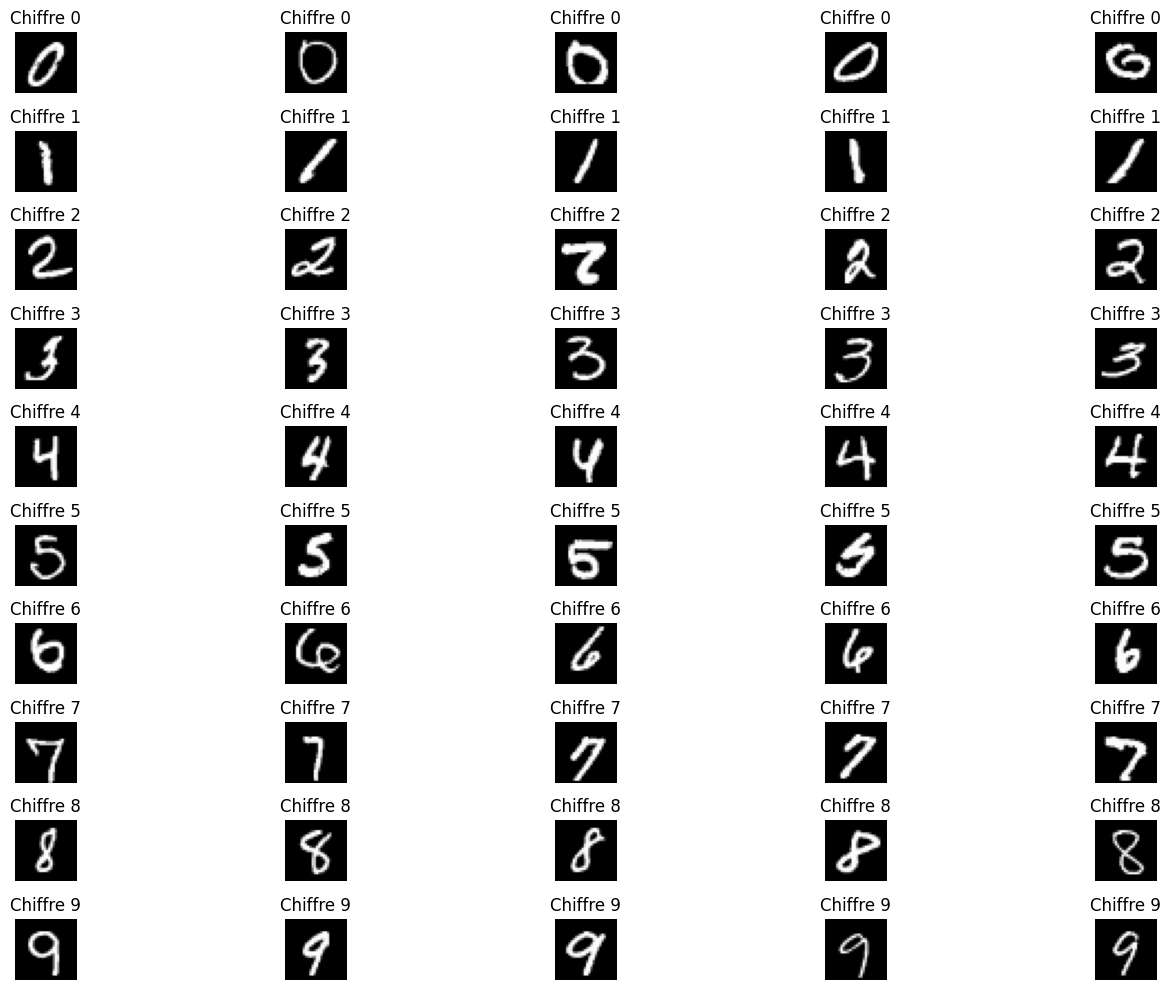

In [9]:
# prompt: Présentation d'images de chiffres pour montrer les variations d'écriture.

# Affichage de quelques exemples d'images pour chaque chiffre
num_images_per_digit = 5  # Nombre d'images à afficher par chiffre
plt.figure(figsize=(15, 10))

for digit in range(10):
    digit_indices = np.where(y_train == digit)[0]
    selected_indices = np.random.choice(digit_indices, size=min(num_images_per_digit, len(digit_indices)), replace=False)

    for i, index in enumerate(selected_indices):
        plt.subplot(10, num_images_per_digit, digit * num_images_per_digit + i + 1)
        plt.imshow(x_train[index].reshape(28, 28), cmap="gray")
        plt.title(f"Chiffre {digit}")
        plt.axis("off")

plt.tight_layout()
plt.show()

In [10]:
# prompt: Vérification de la répartition des chiffres (équilibrée entre 0 et 9).

import numpy as np

# Vérification de la répartition des chiffres dans l'ensemble d'entraînement
digit_counts = np.bincount(y_train)

for digit in range(10):
    print(f"Chiffre {digit}: {digit_counts[digit]} exemples")

# Calculer et afficher le pourcentage de chaque chiffre
total_samples = len(y_train)
for digit in range(10):
  percentage = (digit_counts[digit] / total_samples) * 100
  print(f"Chiffre {digit}: {percentage:.2f}%")

Chiffre 0: 5923 exemples
Chiffre 1: 6742 exemples
Chiffre 2: 5958 exemples
Chiffre 3: 6131 exemples
Chiffre 4: 5842 exemples
Chiffre 5: 5421 exemples
Chiffre 6: 5918 exemples
Chiffre 7: 6265 exemples
Chiffre 8: 5851 exemples
Chiffre 9: 5949 exemples
Chiffre 0: 9.87%
Chiffre 1: 11.24%
Chiffre 2: 9.93%
Chiffre 3: 10.22%
Chiffre 4: 9.74%
Chiffre 5: 9.04%
Chiffre 6: 9.86%
Chiffre 7: 10.44%
Chiffre 8: 9.75%
Chiffre 9: 9.92%


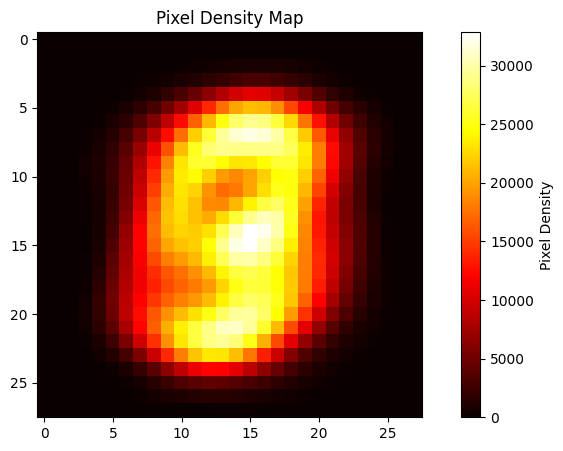

Number of pixels below threshold: 79
Indices of unused pixels: [  0   1   2   3   4   5   6   7   8   9  10  11  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  52  53  54  55  56  57
  82  83  84  85 111 112 113 140 141 168 169 364 448 476 532 560 588 615
 616 644 645 671 672 673 699 700 701 727 728 729 730 731 752 754 755 756
 757 758 759 780 781 782 783]


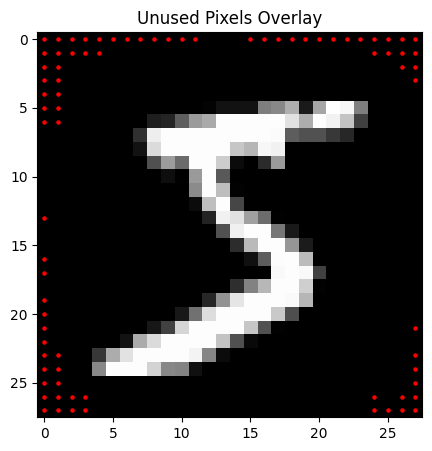

In [ ]:
# prompt: Analyse de la densité des pixels pour observer les zones les plus utilisées dans l'image (ex. bords souvent vides).

import numpy as np
import matplotlib.pyplot as plt


# Calculate pixel density
pixel_density = np.sum(x_train, axis=0)

# Display pixel density
plt.figure(figsize=(10, 5))
plt.imshow(pixel_density.reshape(28, 28), cmap="hot")
plt.colorbar(label="Pixel Density")
plt.title("Pixel Density Map")
plt.show()


# Analyze pixel density to identify frequently unused areas
# For example, find pixels with density below a threshold
threshold = np.percentile(pixel_density, 10) # Example threshold: 10th percentile
unused_pixels = np.where(pixel_density < threshold)[0]

print(f"Number of pixels below threshold: {len(unused_pixels)}")
print(f"Indices of unused pixels: {unused_pixels}")

# Further analysis:
# Visualize the unused pixels on the image
plt.figure(figsize=(10, 5))
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.scatter(unused_pixels % 28, unused_pixels // 28, c='red', s=5)  # Mark unused pixels in red
plt.title('Unused Pixels Overlay')
plt.show()

**BASIQUE**

In [ ]:
# Définition du modèle MLP
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes pour les chiffres de 0 à 9
])

# Compilation du modèle
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Affichage du résumé du modèle
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entraînement du modèle
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8795 - loss: 0.4207 - val_accuracy: 0.9630 - val_loss: 0.1160
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9676 - loss: 0.1088 - val_accuracy: 0.9642 - val_loss: 0.1170
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9773 - loss: 0.0720 - val_accuracy: 0.9725 - val_loss: 0.0886
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0501 - val_accuracy: 0.9727 - val_loss: 0.0867
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 0.9783 - val_loss: 0.0728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9892 - loss: 0.0327 - val_accuracy: 0.9763 - val_loss: 0.0827
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9784 - val_loss: 0.0892
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0237 

In [ ]:
# Évaluation du modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.1071
Test accuracy: 0.9757


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


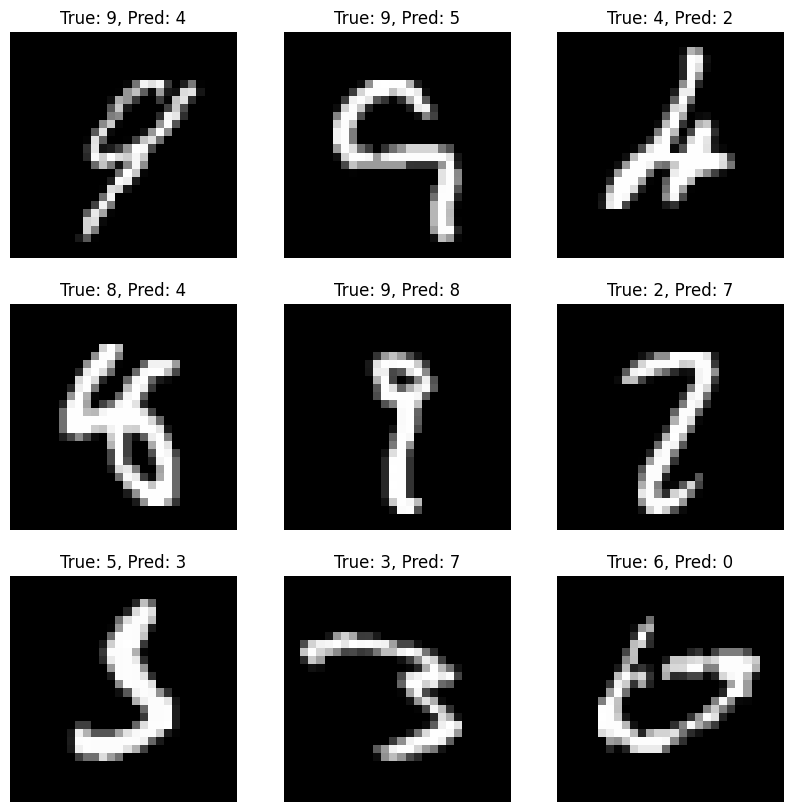

In [ ]:
# Prédictions sur les données de test
y_pred = np.argmax(model.predict(x_test), axis=1)

# Affichage des premières erreurs de classification
errors = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(errors[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis("off")
plt.show()


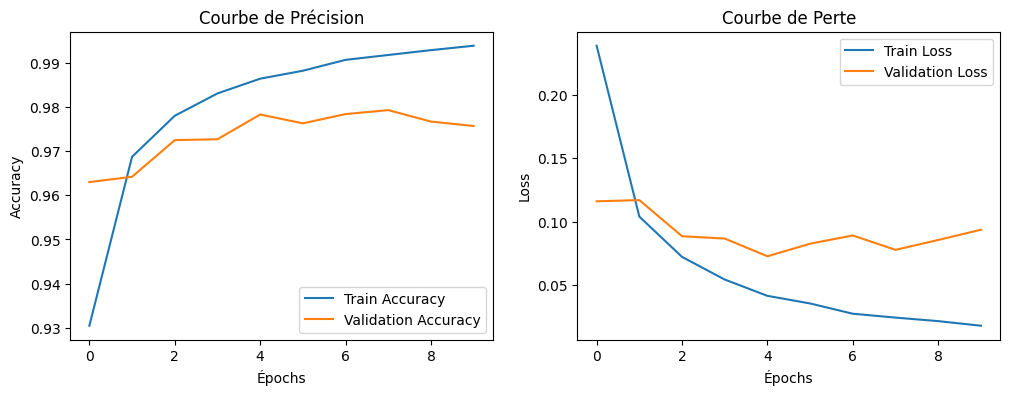

In [ ]:
# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 4))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de Précision')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de Perte')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


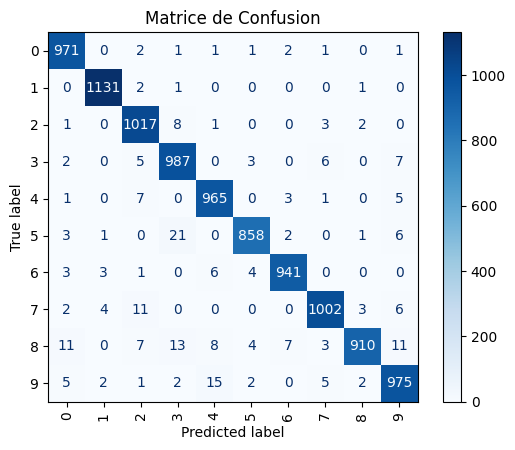

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur les données de test
y_pred = np.argmax(model.predict(x_test), axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Matrice de Confusion')
plt.show()


# **FINE TUNNING 2 COUCHE 512 PAR COUCHE**

In [ ]:
import keras_tuner as kt

# Définir la fonction de création de modèle
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=64, max_value=512, step=64),
                           activation='relu', input_shape=(784,)))
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Ajouter une deuxième couche cachée
    model.add(layers.Dense(units=hp.Int('units_2', min_value=64, max_value=512, step=64),
                           activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))


    # Couche de sortie
    model.add(layers.Dense(10, activation='softmax'))

    # Compiler le modèle
    model.compile(optimizer=keras.optimizers.Adam(
                      learning_rate=hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-3, 5e-4, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instancier le tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Nombre maximum de combinaisons testées
    executions_per_trial=2,  # Répéter chaque essai pour plus de fiabilité
    directory='mnist_tuning',
    project_name='mlp_tuning'
)

# Lancer la recherche d'hyperparamètres
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Récupérer le meilleur modèle
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Meilleurs hyperparamètres : {best_hps.values}")


Trial 10 Complete [00h 03m 43s]
val_accuracy: 0.9761500060558319

Best val_accuracy So Far: 0.982699990272522
Total elapsed time: 00h 52m 32s
Meilleurs hyperparamètres : {'units_1': 256, 'dropout_1': 0.2, 'units_2': 64, 'dropout_2': 0.4, 'learning_rate': 0.001}


In [ ]:
# Sauvegarder le modèle au format TensorFlow SavedModel
model.save('mnist_optimal_model.keras')


In [ ]:
# Construire le modèle optimal avec les hyperparamètres trouvés
model_optimal = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

# Compiler le modèle
model_optimal.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

# Entraîner le modèle
history_optimal = model_optimal.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

# Évaluer les performances finales
test_loss_optimal, test_accuracy_optimal = model_optimal.evaluate(x_test, y_test)
print(f"Accuracy sur le test avec le modèle optimal : {test_accuracy_optimal:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8163 - loss: 0.5780 - val_accuracy: 0.9624 - val_loss: 0.1263
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9495 - loss: 0.1736 - val_accuracy: 0.9715 - val_loss: 0.0985
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9659 - loss: 0.1204 - val_accuracy: 0.9724 - val_loss: 0.0878
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9699 - loss: 0.1027 - val_accuracy: 0.9733 - val_loss: 0.0898
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9748 - loss: 0.0845 - val_accuracy: 0.9794 - val_loss: 0.0772
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9756 - loss: 0.0797 - val_accuracy: 0.9789 - val_loss: 0.0742
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9797 - loss: 0.0690 - val_accuracy: 0.9795 - val_loss: 0.0754
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9804 - loss: 0.

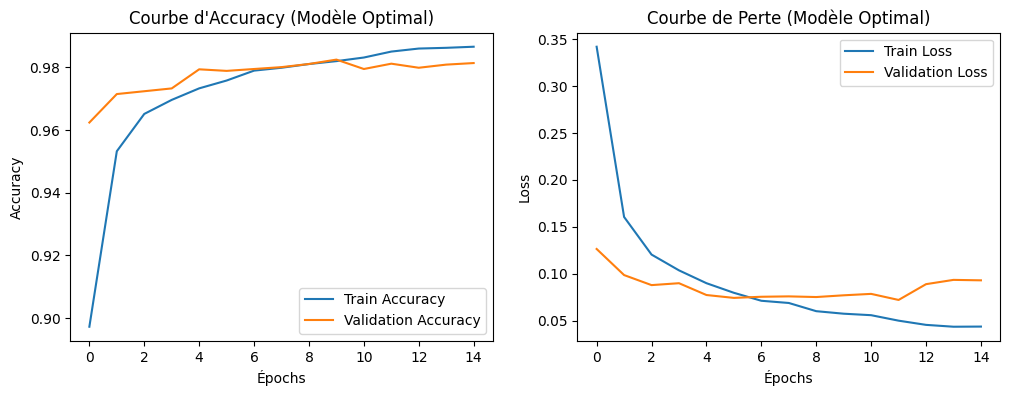

In [ ]:
plt.figure(figsize=(12, 4))

# Courbe d'accuracy
plt.subplot(1, 2, 1)
plt.plot(history_optimal.history['accuracy'], label='Train Accuracy')
plt.plot(history_optimal.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe d\'Accuracy (Modèle Optimal)')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history_optimal.history['loss'], label='Train Loss')
plt.plot(history_optimal.history['val_loss'], label='Validation Loss')
plt.title('Courbe de Perte (Modèle Optimal)')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


STOP A 7 POUR OVERFITTING

In [ ]:
# Construire le modèle optimal avec les hyperparamètres trouvés
model_optimal = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

# Compiler le modèle
model_optimal.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

# Entraîner le modèle
history_optimal = model_optimal.fit(
    x_train, y_train,
    epochs=7,
    validation_data=(x_test, y_test)
)

# Évaluer les performances finales
test_loss_optimal, test_accuracy_optimal = model_optimal.evaluate(x_test, y_test)
print(f"Accuracy sur le test avec le modèle optimal : {test_accuracy_optimal:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8245 - loss: 0.5651 - val_accuracy: 0.9658 - val_loss: 0.1168
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9540 - loss: 0.1612 - val_accuracy: 0.9717 - val_loss: 0.0922
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9640 - loss: 0.1223 - val_accuracy: 0.9737 - val_loss: 0.0895
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9702 - loss: 0.0990 - val_accuracy: 0.9781 - val_loss: 0.0772
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9761 - loss: 0.0797 - val_accuracy: 0.9780 - val_loss: 0.0758
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9781 - loss: 0.0727 - val_accuracy: 0.9795 - val_loss: 0.0768
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9781 - loss: 0.0693 - val_accuracy: 0.9800 - val_loss: 0.0759
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0885
Accuracy sur le t

In [ ]:
# Évaluer les performances sur le jeu de test
test_loss, test_accuracy = model_optimal.evaluate(x_test, y_test, verbose=2)
print(f"Loss sur le test: {test_loss}")
print(f"Accuracy sur le test: {test_accuracy}")


313/313 - 1s - 2ms/step - accuracy: 0.9800 - loss: 0.0759
Loss sur le test: 0.07590144127607346
Accuracy sur le test: 0.9800000190734863


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


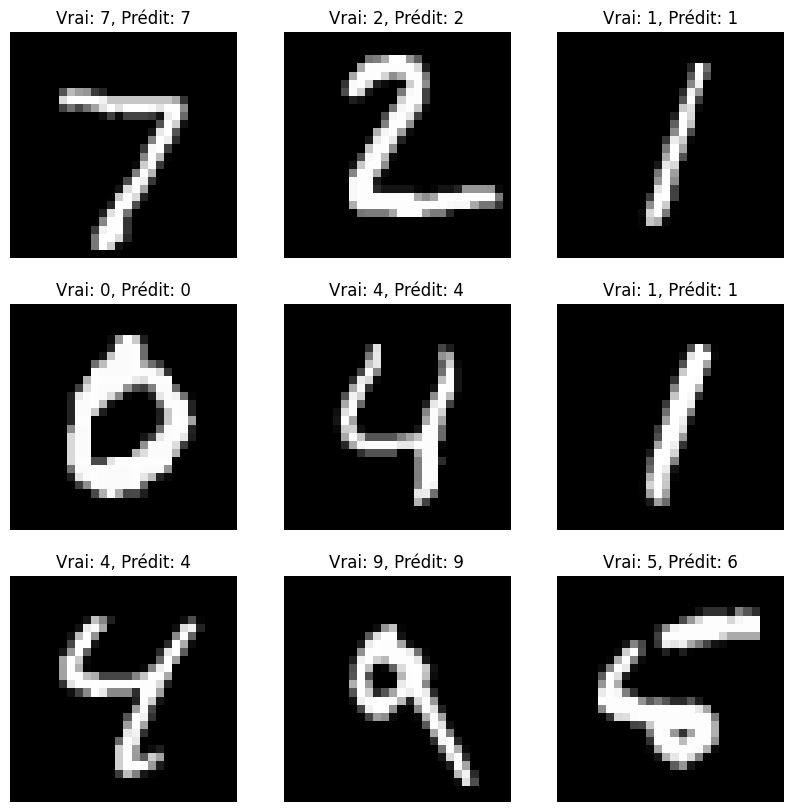

In [ ]:
# Faire des prédictions
predictions = model_optimal.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualiser quelques exemples
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Vrai: {y_test[i]}, Prédit: {predicted_labels[i]}")
    plt.axis("off")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Prédictions
predictions = model_optimal.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Affichage des catégories les plus confondues
confused_pairs = []
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j and conf_matrix[i][j] > 0:  # Erreurs uniquement
            confused_pairs.append((i, j, conf_matrix[i][j]))

# Trier par fréquence décroissante
confused_pairs = sorted(confused_pairs, key=lambda x: x[2], reverse=True)

# Afficher les catégories les plus confondues
print("Catégories les plus confondues (Vrai, Prédit, Fréquence):")
for pair in confused_pairs[:5]:  # Les 5 premières confusions
    print(f"Vrai: {pair[0]}, Prédit: {pair[1]}, Fréquence: {pair[2]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Catégories les plus confondues (Vrai, Prédit, Fréquence):
Vrai: 3, Prédit: 5, Fréquence: 17
Vrai: 9, Prédit: 4, Fréquence: 14
Vrai: 6, Prédit: 0, Fréquence: 9
Vrai: 1, Prédit: 8, Fréquence: 7
Vrai: 4, Prédit: 9, Fréquence: 7


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


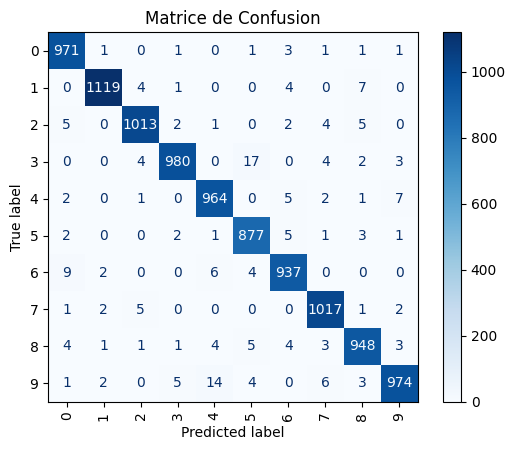

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur les données de test
y_pred = np.argmax(model_optimal.predict(x_test), axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Matrice de Confusion')
plt.show()



Classe la plus confondue : Vrai: 3, Prédit: 5


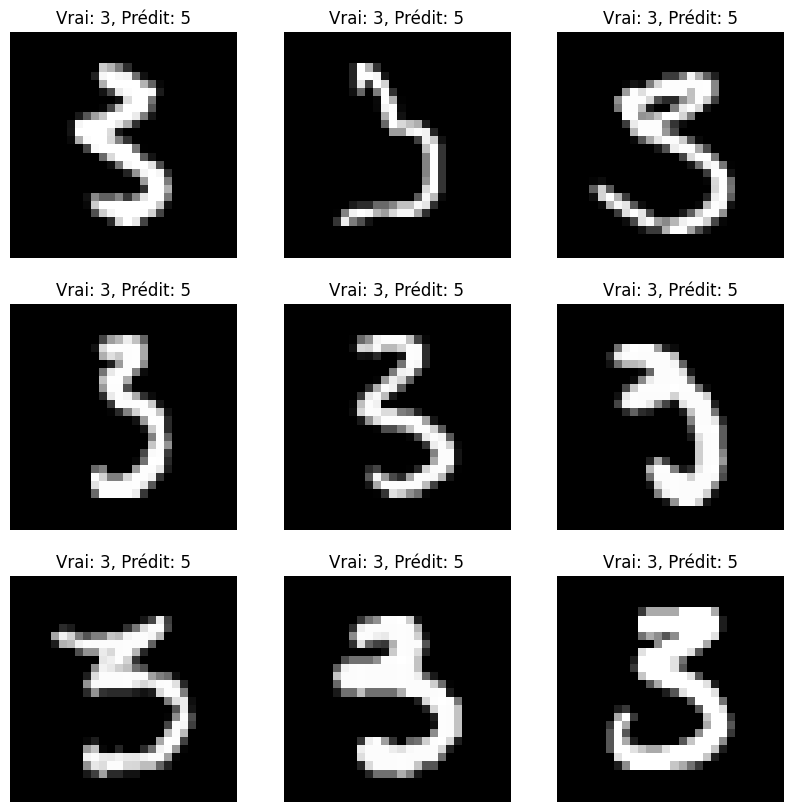

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Trouver les paires les plus confondues
confused_pairs_sorted = sorted(confused_pairs, key=lambda x: x[2], reverse=True)[:5]  # Les 5 plus fréquentes
most_confused = confused_pairs_sorted[0]  # La paire la plus confondue

true_label, predicted_label = most_confused[0], most_confused[1]
print(f"Classe la plus confondue : Vrai: {true_label}, Prédit: {predicted_label}")

# Filtrer les images avec cette confusion
confused_indices = np.where((y_test == true_label) & (predicted_labels == predicted_label))[0]

# Afficher les images confondues
plt.figure(figsize=(10, 10))
for i, idx in enumerate(confused_indices[:9]):  # Montrer jusqu'à 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Vrai: {true_label}, Prédit: {predicted_label}")
    plt.axis("off")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


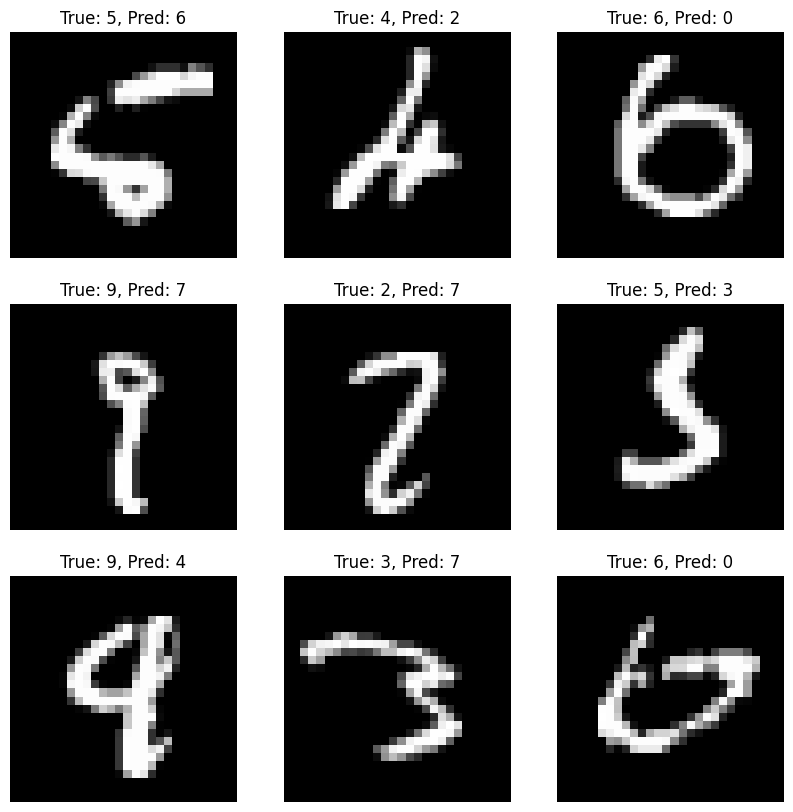

In [ ]:
# Prédictions sur les données de test
y_pred = np.argmax(model_optimal.predict(x_test), axis=1)

# Affichage des premières erreurs de classification
errors = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(errors[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis("off")
plt.show()

**FINE TUNNING 3 COUCHE 512**

In [5]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [6]:
import keras_tuner as kt

# Définir la fonction de création de modèle
def build_model2(hp):
    model2 = keras.Sequential()
    model2.add(layers.Dense(units=hp.Int('units_1', min_value=64, max_value=512, step=64),
                           activation='relu', input_shape=(784,)))
    model2.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    # Ajouter une deuxième couche cachée
    model2.add(layers.Dense(units=hp.Int('units_2', min_value=64, max_value=512, step=64),
                           activation='relu'))
    model2.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Ajouter une troisème couche cachée
    model2.add(layers.Dense(units=hp.Int('units_3', min_value=64, max_value=512, step=64),
                           activation='relu'))
    model2.add(layers.Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))


    # Couche de sortie
    model2.add(layers.Dense(10, activation='softmax'))

    # Compiler le modèle
    model2.compile(optimizer=keras.optimizers.Adam(
                      learning_rate=hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-3, 5e-4, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model2

# Instancier le tuner
tuner2 = kt.RandomSearch(
    build_model2,
    objective='val_accuracy',
    max_trials=15,  # Nombre maximum de combinaisons testées
    executions_per_trial=2,  # Répéter chaque essai pour plus de fiabilité
    directory='mnist_tuning',
    project_name='mlp_tuning'
)

# Lancer la recherche d'hyperparamètres
tuner2.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Récupérer le meilleur modèle
best_hps2 = tuner2.get_best_hyperparameters(num_trials=1)[0]
print(f"Meilleurs hyperparamètres : {best_hps2.values}")


Trial 15 Complete [00h 05m 48s]
val_accuracy: 0.9821000099182129

Best val_accuracy So Far: 0.9825499951839447
Total elapsed time: 01h 45m 41s
Meilleurs hyperparamètres : {'units_1': 384, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.30000000000000004, 'units_3': 512, 'dropout_3': 0.30000000000000004, 'learning_rate': 0.0005}


In [ ]:
import keras_tuner as kt

In [5]:
# Construire le modèle optimal avec les hyperparamètres trouvés
model_optimal2 = keras.Sequential([
    layers.Dense(384, activation="relu", input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.30000000000000004),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.30000000000000004),
    layers.Dense(10, activation="softmax")
])

# Compiler le modèle
model_optimal2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

# Entraîner le modèle
history_optimal = model_optimal2.fit(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

# Évaluer les performances finales
test_loss_optimal, test_accuracy_optimal = model_optimal2.evaluate(x_test, y_test)
print(f"Accuracy sur le test avec le modèle optimal : {test_accuracy_optimal:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8250 - loss: 0.5622 - val_accuracy: 0.9650 - val_loss: 0.1151
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9575 - loss: 0.1420 - val_accuracy: 0.9736 - val_loss: 0.0898
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9705 - loss: 0.1004 - val_accuracy: 0.9762 - val_loss: 0.0818
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9755 - loss: 0.0785 - val_accuracy: 0.9785 - val_loss: 0.0693
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9800 - loss: 0.0659 - val_accuracy: 0.9797 - val_loss: 0.0709
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9806 - val_loss: 0.0653
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9844 - loss: 0.0512 - val_accuracy: 0.9787 - val_loss: 0.0808
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9847 - loss: 0

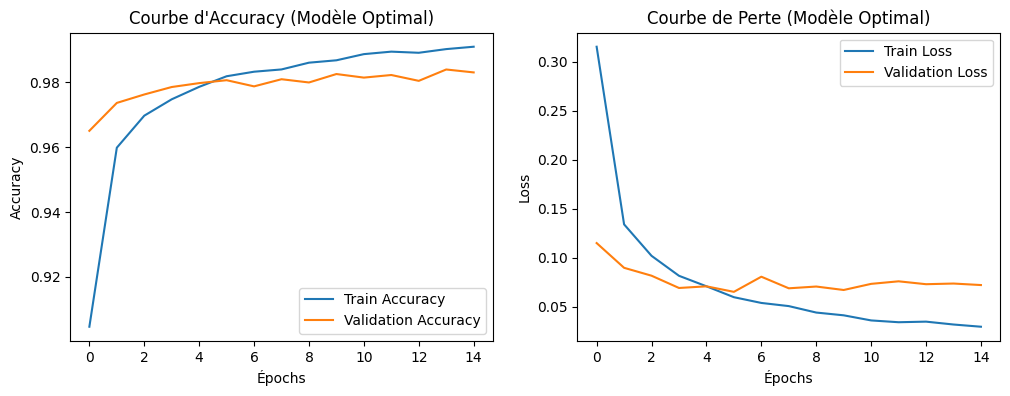

In [6]:
plt.figure(figsize=(12, 4))

# Courbe d'accuracy
plt.subplot(1, 2, 1)
plt.plot(history_optimal.history['accuracy'], label='Train Accuracy')
plt.plot(history_optimal.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe d\'Accuracy (Modèle Optimal)')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history_optimal.history['loss'], label='Train Loss')
plt.plot(history_optimal.history['val_loss'], label='Validation Loss')
plt.title('Courbe de Perte (Modèle Optimal)')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
